In [239]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import cv2
 
img = cv2.imread('ready_img.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA)
img = cv2.normalize(img,None, 0, 350, cv2.NORM_MINMAX)

vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)

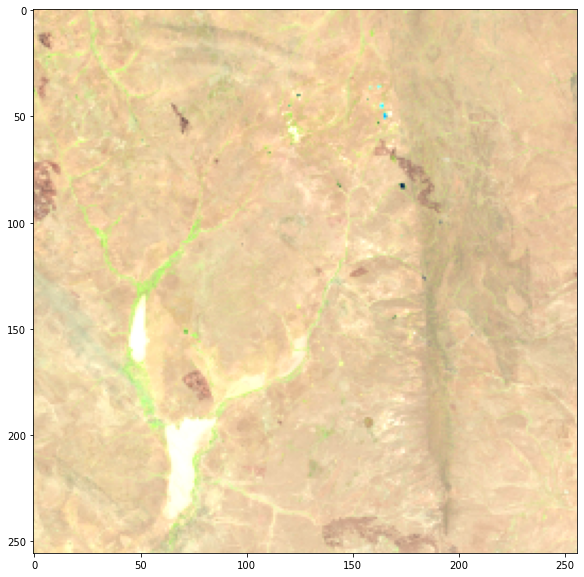

In [240]:
plt.figure(figsize=(10,10))
plt.imshow(img)

## K-Means

In [235]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

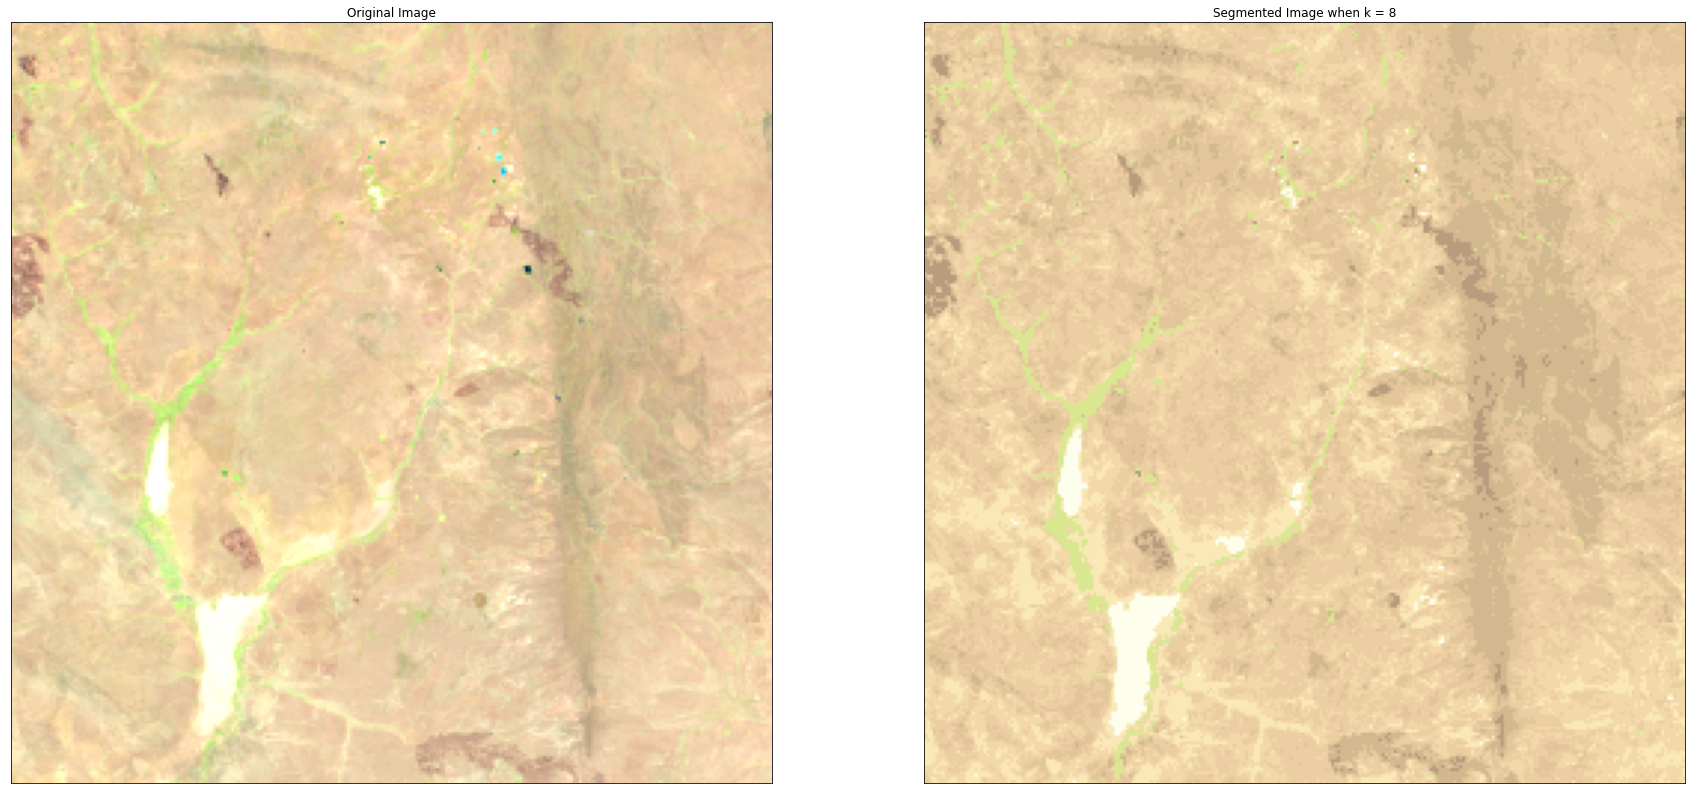

In [236]:
k = 8
ret,label,center=cv2.kmeans(vectorized, k,None,criteria,10,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]

result_image = res.reshape((img.shape))

plt.figure(figsize=(30,30))

plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when k = %i' % k), plt.xticks([]), plt.yticks([])
plt.show()

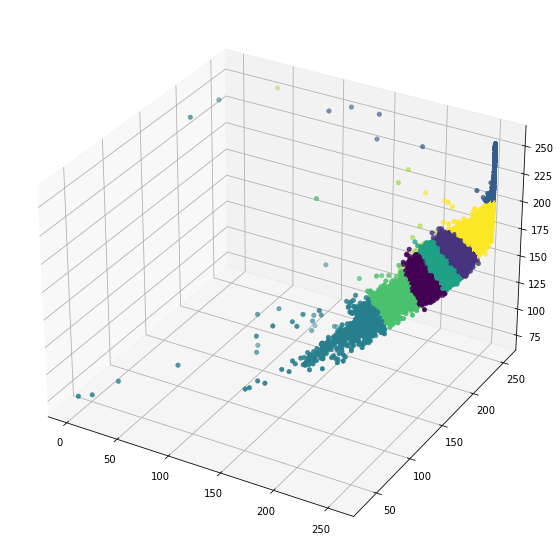

In [237]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter(vectorized[:, 0], vectorized[:, 1], vectorized[:, 2], c=label, linewidth=0.5);

## Superpixels

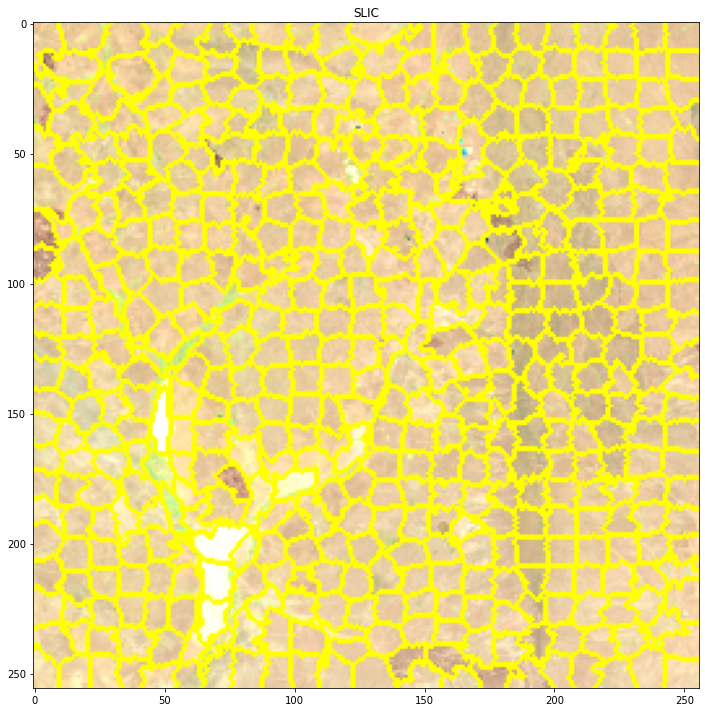

In [244]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.filters import sobel
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

segments_slic = slic(img, n_segments=500, compactness=10, sigma=0.1,
                     start_label=1)
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

plt.imshow(mark_boundaries(img, segments_slic))
plt.title('SLIC')

plt.tight_layout()
plt.show()

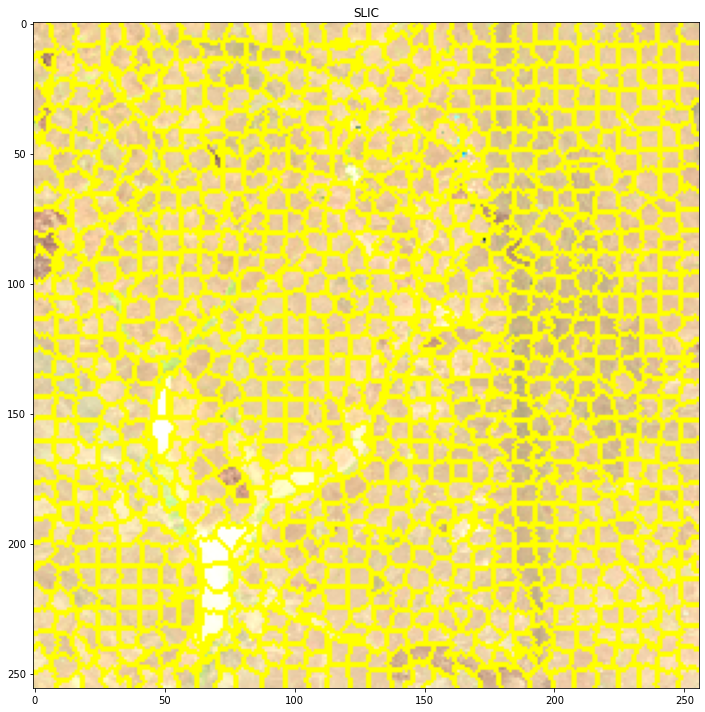

In [245]:
segments_slic = slic(img, n_segments=1000, compactness=10, sigma=0.1,
                     start_label=1)
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

plt.imshow(mark_boundaries(img, segments_slic))
plt.title('SLIC')

plt.tight_layout()
plt.show()